In [2]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [3]:
feature_id = 1

In [18]:
before_intensity_descent_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/feature-{}-ms2-peaks-before-intensity-descent.csv'.format(feature_id))
before_deconvolution_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/feature-{}-ms2-peaks-before-deconvolution.csv'.format(feature_id))
after_deconvolution_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/feature-{}-ms2-peaks-after-deconvolution.csv'.format(feature_id))

In [19]:
before_intensity_descent_df.head()

,mz,intensity
0,133.596214,9.0
1,180.467447,9.0
2,213.418260,9.0
3,266.156364,9.0
4,268.404245,9.0


In [20]:
before_deconvolution_df.head()

,mz,intensity
0,542.238726,169.0
1,856.365129,382.0
2,328.138792,132.0
3,489.680352,130.0
4,413.254215,114.0


In [21]:
after_deconvolution_df.head()

,mz,charge,intensity,score,SN
0,291.1473,1,44.0,0.000000,44.0
1,294.1793,1,55.0,0.000000,55.0
2,303.1305,1,83.0,9.110434,83.0
3,319.0454,1,51.0,0.000000,51.0
4,325.1864,1,55.0,0.000000,55.0


In [22]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Rescale to values between 0 and 1
tableau20_mpl = tableau20.copy()
for i in range(len(tableau20_mpl)):  
    r, g, b = tableau20_mpl[i]  
    tableau20_mpl[i] = (r / 255., g / 255., b / 255.)

In [44]:
from astropy.convolution import convolve

ModuleNotFoundError: No module named 'astropy'

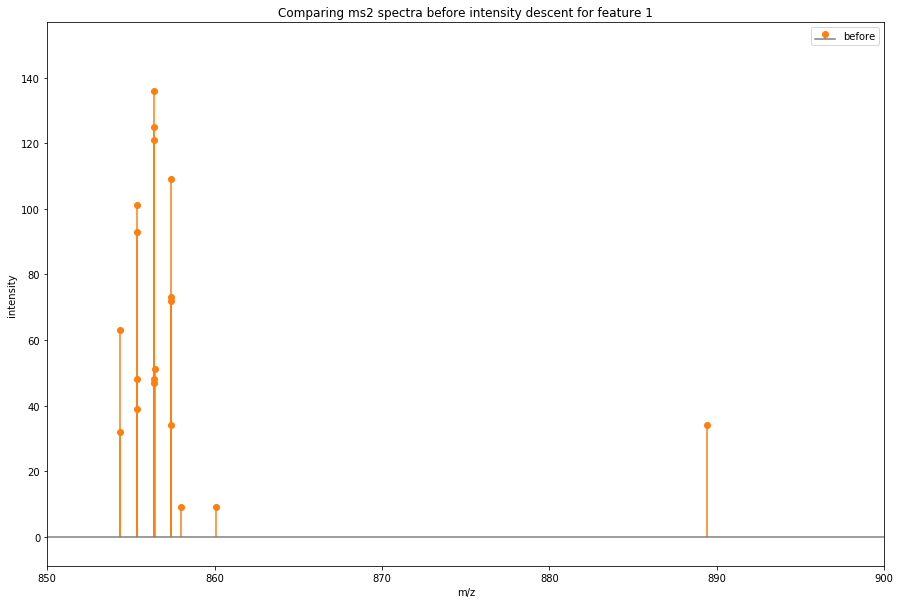

In [45]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

markerline, stemlines, baseline = ax.stem(before_intensity_descent_df.mz, before_intensity_descent_df.intensity, label='before', use_line_collection=True)
plt.setp(markerline, 'color', colors[1])
plt.setp(stemlines, 'color', colors[1])
plt.setp(baseline, 'color', colors[7])

x_min = 850
x_max = 900

tick_spacing = 5

plt.xlabel('m/z')
plt.ylabel('intensity')
f.set_figheight(10)
f.set_figwidth(15)
ax.set_xlim((x_min,x_max))
# plt.xticks(np.arange(x_min, x_max+1, 1.0))
# ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.margins(0.06)
plt.legend(loc='best')
plt.title('Comparing ms2 spectra before intensity descent for feature {}'.format(feature_id))
plt.show()

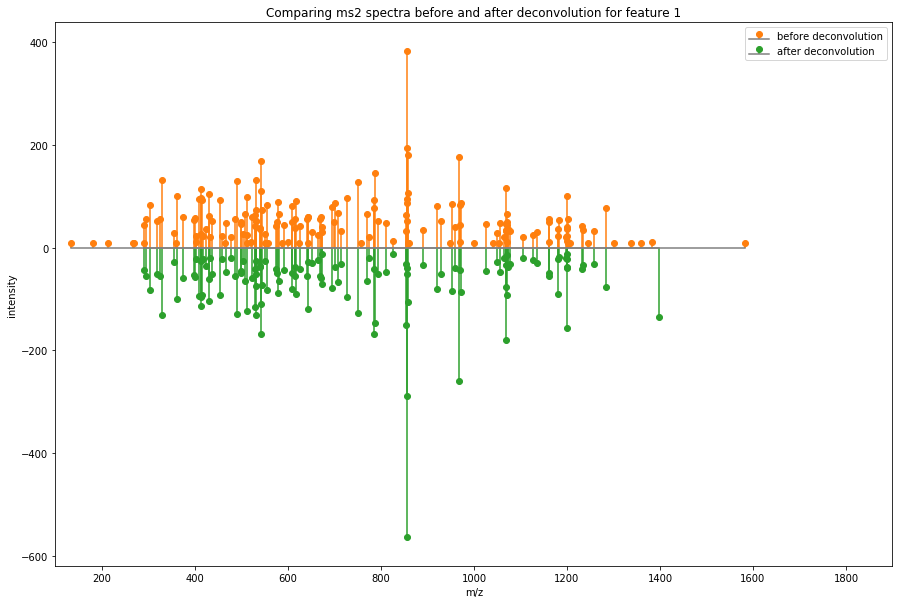

In [46]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

markerline, stemlines, baseline = ax.stem(before_deconvolution_df.mz, before_deconvolution_df.intensity, label='before deconvolution', use_line_collection=True)
plt.setp(markerline, 'color', colors[1])
plt.setp(stemlines, 'color', colors[1])
plt.setp(baseline, 'color', colors[7])

markerline, stemlines, baseline = ax.stem(after_deconvolution_df.mz, -after_deconvolution_df.intensity, label='after deconvolution', use_line_collection=True)
plt.setp(markerline, 'color', colors[2])
plt.setp(stemlines, 'color', colors[2])
plt.setp(baseline, 'color', colors[7])

plt.xlabel('m/z')
plt.ylabel('intensity')
f.set_figheight(10)
f.set_figwidth(15)
ax.set_xlim((100,1900))
plt.margins(0.06)
plt.legend(loc='best')
plt.title('Comparing ms2 spectra before and after deconvolution for feature {}'.format(feature_id))
plt.show()